In [68]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

In [70]:
from sklearn.preprocessing import LabelEncoder

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
songs = pd.read_csv('songs_final422.csv')

In [73]:
songs

,Artist,Song Title,Stemmed With Stop Words,Stemmed No Stop Words,Row_Index,Genre
0,Bruno Mars,"['Finesse', '(', 'Remix', ')']","['drop', 'top', 'porsch', 'porsch', 'rolli', '...","['drop', 'top', 'porsch', 'porsch', 'rolli', '...",0,R&B
1,Bruno Mars,"['When', 'I', 'Was', 'Your', 'Man']","['same', 'bed', 'but', 'it', 'feel', 'just', '...","['bed', 'feel', 'littl', 'bit', 'bigger', 'son...",1,Pop
2,Bruno Mars,"['Versace', 'on', 'the', 'Floor']","['let', ""'s"", 'take', 'our', 'time', 'tonight'...","['let', ""'s"", 'take', 'time', 'tonight', 'girl...",2,R&B
3,Bruno Mars,"['24K', 'Magic']","['tonight', 'i', 'just', 'wan', 'na', 'take', ...","['tonight', 'wan', 'na', 'take', 'higher', 'th...",3,R&B
4,Bruno Mars,"['It', 'Will', 'Rain']","['if', 'you', 'ever', 'leav', 'me', 'babi', 'l...","['ever', 'leav', 'babi', 'leav', 'morphin', 'd...",4,Pop
...,...,...,...,...,...,...
10375,MØ,"['Final', 'Song']","['pleas', 'wo', ""n't"", 'you', 'wait', 'wo', ""n...","['pleas', 'wo', ""n't"", 'wait', 'wo', ""n't"", 's...",10441,Pop
10376,Kanye West,"['Devil', 'In', 'A', 'New', 'Dress']","['uh', 'uh', 'i', 'love', 'it', 'though', 'i',...","['uh', 'uh', 'love', 'though', 'love', 'though...",10442,Rap
10377,The Four Seasons,"['December', ',', '1963', '(', 'Oh', ',', 'Wha...","['oh', 'what', 'a', 'night', 'late', 'decemb',...","['oh', 'night', 'late', 'decemb', 'back', ""'63...",10443,Pop
10378,Richard Marx,"['Right', 'Here', 'Waiting']","['ocean', 'apart', 'day', 'after', 'day', 'and...","['ocean', 'apart', 'day', 'day', 'slowli', 'go...",10444,Pop


In [144]:
songs['Genre'].value_counts()

Genre
Pop        3757
Rock       2188
Rap        2044
EDM        1125
R&B         854
Country     412
Name: count, dtype: int64

In [90]:
X = songs['Stemmed No Stop Words']

In [92]:
y = songs['Genre']

In [94]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [96]:
np.unique(y_le)

array([0, 1, 2, 3, 4, 5])

In [98]:
y_le

array([3, 2, 3, ..., 2, 2, 2])

In [132]:
print("Classes:", le.classes_)

Classes: ['Country' 'EDM' 'Pop' 'R&B' 'Rap' 'Rock']


In [102]:
#we need to vectorize X since SVM can not interpret raw text
bagofwords = CountVectorizer()
X = bagofwords.fit_transform(X)

In [104]:
X

<10380x35737 sparse matrix of type '<class 'numpy.int64'>'
	with 931512 stored elements in Compressed Sparse Row format>

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size=0.20, random_state=51)

In [110]:
#a base model without adjusting class_weights to account for class imbalance
svcmodel1 = SVC()

In [112]:
#a base model without adjusting class_weights to account for class imbalance
svcmodel1 = SVC()

SVC()

In [138]:
svc_predictions = svcmodel1.predict(X_test)

In [139]:
from sklearn.metrics import classification_report

In [160]:
svc1_report = classification_report(y_test, svc1_predictions, target_names=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
print(svc1_report)

              precision    recall  f1-score   support

     Country       1.00      0.05      0.09        85
         EDM       0.38      0.01      0.02       233
         Pop       0.47      0.84      0.61       742
         R&B       0.82      0.05      0.10       169
         Rap       0.80      0.68      0.74       412
        Rock       0.48      0.42      0.45       435

    accuracy                           0.53      2076
   macro avg       0.66      0.34      0.33      2076
weighted avg       0.58      0.53      0.47      2076



In [152]:
#now we are running a model where we account for the class imbalance

svcmodel2 = SVC(class_weight = 'balanced')

In [154]:
svcmodel2.fit(X_train, y_train)

SVC(class_weight='balanced')

In [156]:
svc2_predictions = svcmodel2.predict(X_test)

In [162]:
svc2_report = classification_report(y_test, svc2_predictions, target_names=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
print(svc2_report)

              precision    recall  f1-score   support

     Country       0.37      0.45      0.41        85
         EDM       0.32      0.33      0.32       233
         Pop       0.58      0.42      0.49       742
         R&B       0.26      0.28      0.27       169
         Rap       0.77      0.71      0.74       412
        Rock       0.43      0.63      0.51       435

    accuracy                           0.50      2076
   macro avg       0.46      0.47      0.46      2076
weighted avg       0.52      0.50      0.50      2076



In [168]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [166]:
# create a confusion matrix for the balanced model
svc2_cm = confusion_matrix(y_test, svc2_predictions)


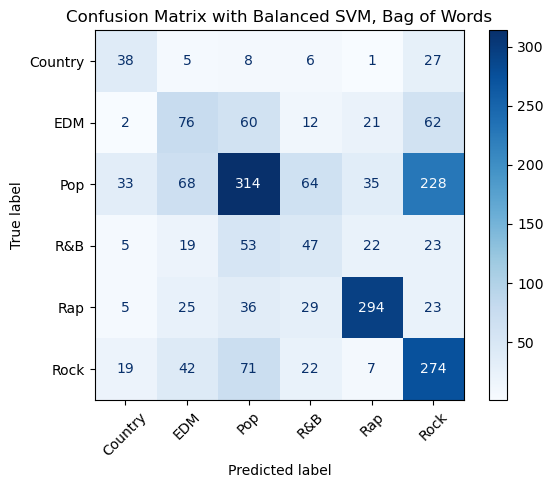

In [174]:
# plot the confusion matrix
svc2_cm_plot = ConfusionMatrixDisplay(confusion_matrix=svc2_cm, display_labels=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
svc2_cm_plot.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix with Balanced SVM, Bag of Words")
plt.show()

In [ ]:
#now we are going to use word2vec to generate dense vectors

In [178]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [182]:
pip install --upgrade scipy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 814.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/40.9 MB 14.9 MB/s eta 0:00:03
   - -------------------------------------- 1.4/40.9 MB 18.2 MB/s eta 0:00:03
   -- ------------------------------------- 2.6/40.9 MB 20.9 MB/s eta 0:00:02
   ---- ----------------------------------- 4.5/40.9 MB 26.0 MB/s eta 0:00:02
   ------ --------------------------------- 6.3/40.9 MB 31.1 MB/s eta 0:00:02
   -------- ------------------------------- 8.6/40.9 MB 36.9 MB/s eta 0:00:01
   ----------- ---------------------------- 11.5/40.9 MB 50.4 MB/s eta 0:00:01
   ----

In [184]:
from gensim.models import Word2Vec

ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\ProgramData\anaconda3\Lib\site-packages\scipy\linalg\__init__.py)